In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Sigmoid Function

In [2]:
def sigmoid(z):
  """
  Sigmoid Function: σ(z) = 1 / (1 + e^(-z))
  Maps any real value to the (0,1) range
  """

  return 1 / (1 + np.exp(-z))

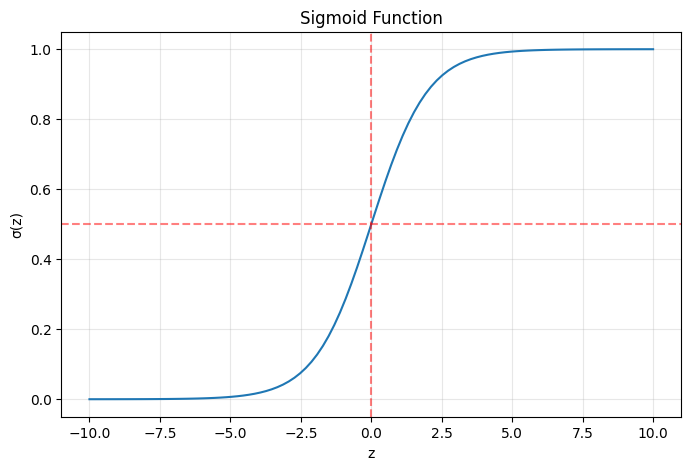

In [9]:
# Visualization
z = np.linspace(-10,10,100) # 100 evenly spaced points between -10 and 10
plt.figure(figsize=(8,5))
plt.plot(z,sigmoid(z))
plt.grid(True, alpha=0.3) # alpha is the transparency
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.title("Sigmoid Function")
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5) # Adding horizontal line
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5) # Adding vertical line
plt.show()

### Testing the property: 1 - σ(x) = σ(-x)

In [19]:
x = 3.14168
print(f"1 - σ({x}) = {1 - sigmoid(x):.6f}")
print(f"σ(-{x}) = {sigmoid(-x):.6f}")
print(f"Property holds: {np.isclose(1 - sigmoid(x), sigmoid(-x))}")  # Check if values are approximately equal

1 - σ(3.14168) = 0.041420
σ(-3.14168) = 0.041420
Property holds: True


##Sentiment Classification Example

In [50]:
class LogisticRegression:
  def __init__(self, n_features):
    """ Initializing weights and bias to zero""" ### In LogReg we initialize to 0 usually, but in deep learning to randomly close to 0 values breaking simmetry (if all weights started at zero, neurons would learn the same features)
    self.w = np.zeros(n_features)
    self.b = 0

  def predict_proba(self,x):
    """
    Compute P(y=1|x) with logistic regression
    x: feature vector
    """

    z = np.dot(self.w, x) + self.b # Linear combination: wx + b
    return(sigmoid(z))

  def predict(self,x):
    """Make binary the prediction using a .5 threshold"""
    return 1 if self.predict_proba(x) > 0.5 else 0

  def __call__(self):
    return("Logistic Regression Model with Weights: ", self.w, "Intercept:", self.b)

In [51]:
# Example from the book (sentiment analysis features)
features = {
    'positive_words': 3,      # Count of positive sentiment words
    'negative_words': 2,      # Count of negative sentiment words
    'has_no': 1,             # Binary: contains word "no"
    'pronouns': 3,           # Count of 1st/2nd person pronouns
    'has_exclamation': 0,    # Binary: contains "!"
    'log_word_count': 4.19   # Log of document length
}

# Converting dic to numpy array (order matters)
x = np.array([features['positive_words'],
              features['negative_words'],
              features['has_no'],
              features['pronouns'],
              features['has_exclamation'],
              features['log_word_count']
])

# Creating model with weights from the book
model = LogisticRegression(n_features=6)
model.w = np.array([2.5, -5.0, -1.2, 0.5, 2.0, 0.7])  # Learned weights from the book
model.b = 0.1

print(model())

# Calculate probabilities
prob_positive = model.predict_proba(x)
prob_negative = 1 - prob_positive

print(f"Feature vector x: {x}")
print(f"Weights w: {model.w}")
print(f"Bias b: {model.b}")
print(f"z = w·x + b = {np.dot(model.w, x) + model.b:.3f}")
print(f"P(positive|x) = {prob_positive:.2f}")
print(f"P(negative|x) = {prob_negative:.2f}")
print(f"Prediction: {'positive' if model.predict(x) == 1 else 'negative'}")


('Logistic Regression Model with Weights: ', array([ 2.5, -5. , -1.2,  0.5,  2. ,  0.7]), 'Intercept:', 0.1)
Feature vector x: [3.   2.   1.   3.   0.   4.19]
Weights w: [ 2.5 -5.  -1.2  0.5  2.   0.7]
Bias b: 0.1
z = w·x + b = 0.833
P(positive|x) = 0.70
P(negative|x) = 0.30
Prediction: positive


#Basic Sigmoid Function Implementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import Optional, Tuple, List, Union, Callable, Literal
# Union is the same as X | Y means the same thing to the type checker as Union[X, Y].
# Callable: Callable[[int], str] signifies a function that takes a single parameter of type int and returns a str.


from numpy.typing import NDArray # An array object represents a multidimensional, homogeneous array of fixed-size items.

In [ ]:
def sigmoid(z : Union[float, NDArray])->  Union[float, NDArray]:
  """
  Sigmoid function, takes z and returns logit
  """

  return 1/(1+np.exp(-z))


sigmoid(3)

np.float64(0.9525741268224334)

In [ ]:
np.ndarray(10) # ndarray(shape, dtype=float, buffer=None, offset=0, strides=None, order=None) An array object represents a multidimensional, homogeneous array of fixed-size items.

array([0.001 , 0.002 , 0.0025, 0.005 , 0.01  , 0.02  , 0.025 , 0.05  ,
       0.1   , 0.2   ])

In [ ]:
np.linspace(0,1,11) # linspace returns evenly spaced numbers over a specified interval.

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
z: NDArray = np.linspace(-10,10,100)
y: NDArray = sigmoid(z)

y

array([4.53978687e-05, 5.55606489e-05, 6.79983174e-05, 8.32200197e-05,
       1.01848815e-04, 1.24647146e-04, 1.52547986e-04, 1.86692945e-04,
       2.28478855e-04, 2.79614739e-04, 3.42191434e-04, 4.18766684e-04,
       5.12469082e-04, 6.27124987e-04, 7.67413430e-04, 9.39055039e-04,
       1.14904229e-03, 1.40591988e-03, 1.72012560e-03, 2.10440443e-03,
       2.57431039e-03, 3.14881358e-03, 3.85103236e-03, 4.70911357e-03,
       5.75728612e-03, 7.03711536e-03, 8.59898661e-03, 1.05038445e-02,
       1.28252101e-02, 1.56514861e-02, 1.90885420e-02, 2.32625358e-02,
       2.83228820e-02, 3.44451957e-02, 4.18339400e-02, 5.07243606e-02,
       6.13831074e-02, 7.41067363e-02, 8.92170603e-02, 1.07052146e-01,
       1.27951705e-01, 1.52235823e-01, 1.80176593e-01, 2.11963334e-01,
       2.47663801e-01, 2.87185901e-01, 3.30246430e-01, 3.76354517e-01,
       4.24816868e-01, 4.74768924e-01, 5.25231076e-01, 5.75183132e-01,
       6.23645483e-01, 6.69753570e-01, 7.12814099e-01, 7.52336199e-01,
      

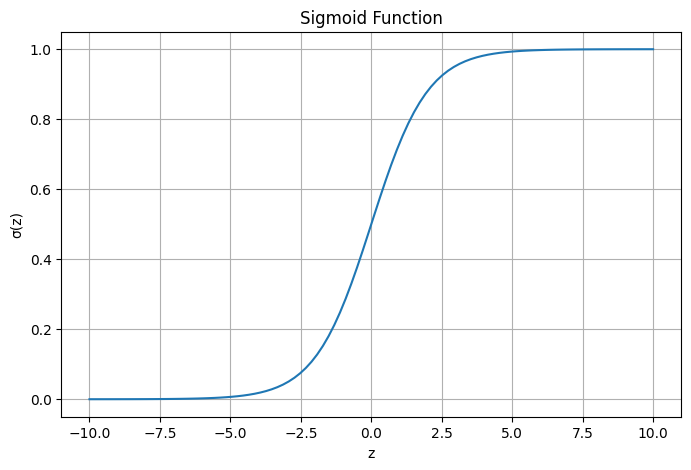

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(z,y)
plt.title("Sigmoid Function")
plt.ylabel("σ(z)"), plt.xlabel("z")
plt.grid(True)
# plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.3)
# plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.show()

#Logistic Regression

In [ ]:
class LogisticRegression:
  """ Binary logistic regression classifier with gradient descent optim"""

  def __init__(
      self,
      learning_rate: float = 0.01,
      num_iterations: int = 1000,
      regularization: Optional[Literal["l1","l2"]] = None,
      lambda_param = 0.1
  ) -> None:
    """
    Initialize Logistic Regression with hyperparameters.

    Parameters:
        learning_rate: Learning rate for gradient descent
        num_iterations: Number of iterations for training
        regularization: Type of regularization ('l1', 'l2', or None)
        lambda_param: Regularization strength
    """

    self.learning_rate: float = learning_rate
    self.num_iterations: int = num_iterations
    self.regularization: Optional[Literal["l1","l2"]] = regularization
    self.lambda_param :float = lambda_param
    self.weights: Optional[NDArray] = None
    self.bias: Optional[float] = None
    self.costs: List[float] = []


  def _initialize_parameters(self, n_features: int) -> None:
    """
    Initialize weights and bias to zeros.

    Parameters:
        n_features: Number of input features
    """

    self.weights = np.zeros(n_features)
    self.bias = 0.0



  def _compute_cost(self, X:NDArray, y:NDArray, y_pred:NDArray) -> float:

    """
    Compute the cost function with optional regularization.

    Parameters:
        X: Input features, shape (m, n_features)
        y: True labels, shape (m,)
        y_pred: Predicted probabilities, shape (m,)

    Returns:
        cost: Cross-entropy loss
    """

    m: int = len(y)

    # Handle numerical stability for log
    epsilon: float = 1e-15

    ##np.clip: limits to a border. Given an interval, values outside the interval are clipped to the interval edges.  For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.
    ##np.clip(valor, cota inferior, cota superior)
    y_pred_clipped: NDArray = np.clip(y_pred, epsilon, 1-epsilon)

    # Cross-entropy loss
    ##  np.sum applies a summatory of the values of an array
    ##  np.log is the natural log here
    cost: float = -1/m * np.sum(y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped))


    ### adding regularization if specified
    # L2 Regularization (Ridge): Cost_L2 = Cost_original + (lambda/(2m)) * sum(w_j^2)
    ### dividing "/2m" to simplify the defivative of the square (**2)

    if self.regularization == "l2":
        cost += (self.lambda_param / (2*m) * np.sum(self.weights **2) )

    # L1 Regularization (Lasso): Cost_L1 = Cost_original + (lambda/m) * sum(|w_j|)
    elif self.regularization == "l1":
        cost += (self.lambda_param / (m)   * np.sum( np.abs(self.weights)))

    return cost


  def _compute_gradients(self,X: NDArray,y: NDArray,y_pred: NDArray) -> Tuple[NDArray, float]:
    """
    Compute gradients for gradient descent.

    Parameters:
    X -- input features, shape (m, n_features)
    y -- true labels, shape (m,)
    y_pred -- predicted probabilities, shape (m,)

    Returns:
    dw -- gradient of the loss with respect to weights
    db -- gradient of the loss with respect to bias
    """

    m = len(y)
    dw = (1/m) * np.dot(X.T, (y_pred - y)) # gradient of the loss with respect to weights
    db = (1/m) * np.sum(y_pred - y) # gradient of the loss with respect to bias

    # Adding regularization if specified
    if self.regularization == "l2":
      dw += (self.lambda_param / m) * self.weights

    elif self.regularization == "l1":
      dw += (self.lambda_param / m) * np.sign(self.weights)


    return dw, db



  def predict_proba(self, X: NDArray):
    """
    Predict class probabilities.

    Parameters:
    X -- input features, shape (m, n_features)

    Returns:
    y_pred -- predicted probabilities, shape (m,)
    """

    if self.weights is None or self.bias is None:
        raise ValueError("Model has not been trained yet. Call fit() first.")

    z: NDArray = np.dot(X, self.weights) + self.bias

    return sigmoid(z)



  def fit (self, X: NDArray, y: NDArray):
    """
    Train the logistic regression model.

    Parameters:
    X -- input features, shape (m, n_features)
    y -- true labels, shape (m,)
    """

    m, k_features = X.shape
    self._initialize_parameters(k_features)

    for i in range(self.num_iterations):

      # Forward pass
      y_pred: NDArray = self.predict_proba(X)


      # Compute cost
      cost: float = self._compute_cost(X, y, y_pred)
      self.costs.append(cost)


      # Compute gradients
      dw, db = self._compute_gradients(X, y, y_pred)


      # Update params
      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db


      # print cost every 100 iters
      if i % 100 == 0:
        print(f"Cost after iteration {i} : {cost}")

    return self


  def predict( self, X: NDArray, threshold: float=0.5) -> NDArray:
    """
    Predict binary class labels.

    Parameters:
    X -- input features, shape (m, n_features)
    threshold -- decision boundary

    Returns:
    y_pred -- predicted labels (0 or 1), shape (m,)
    """


    probabilities: NDArray = self.predict_proba(X)

    return (probabilities >= threshold).astype(int)


  def evaluate(self, X: NDArray, y: NDArray) -> float:
    """
    Evaluate model accuracy.

    Parameters:
    X -- input features, shape (m, n_features)
    y -- true labels, shape (m,)

    Returns:
    accuracy -- proportion of correct predictions
    """

    predictions: NDArray = self.predict(X)
    accuracy: float = np.mean(predictions == y)
    print(f"\nAccuracy on training data: {accuracy:.4f}")
    return accuracy

#Practical Example: Sentiment Analysis


   positive_words  negative_words  contains_no  pronouns_count  \
0               3               2            1               3   
1               1               3            0               2   
2               0               4            1               1   
3               2               1            0               4   
4               5               0            0               3   

   contains_exclamation  log_word_count  sentiment  
0                     0            4.19          1  
1                     1            3.91          0  
2                     0            3.40          0  
3                     1            4.61          1  
4                     1            4.09          1  
Cost after iteration 0 : 0.6931471805599454
Cost after iteration 100 : 0.09247573680037333
Cost after iteration 200 : 0.08278794644859461
Cost after iteration 300 : 0.08119782457531943
Cost after iteration 400 : 0.08078011738108931
Cost after iteration 500 : 0.08060940989105866
Cost a

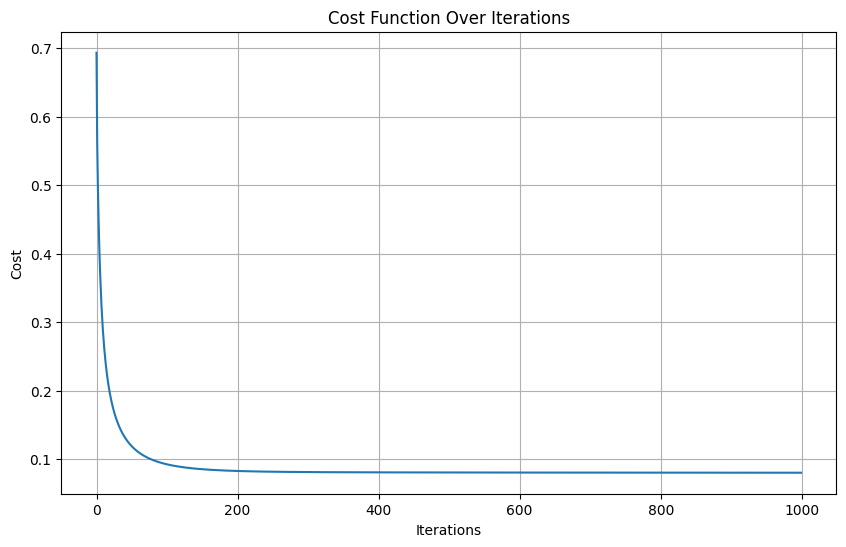

In [ ]:
# Example data from the textbook, Fig 5.2
import pandas as pd

# Create sample data based on the features in Fig 5.2
data = {
    'positive_words': [3, 1, 0, 2, 5],
    'negative_words': [2, 3, 4, 1, 0],
    'contains_no': [1, 0, 1, 0, 0],
    'pronouns_count': [3, 2, 1, 4, 3],
    'contains_exclamation': [0, 1, 0, 1, 1],
    'log_word_count': [4.19, 3.91, 3.40, 4.61, 4.09],
    'sentiment': [1, 0, 0, 1, 1]  # 1 for positive, 0 for negative
}

df = pd.DataFrame(data)
print(df.head())

# Prepare features and target
X = df.drop('sentiment', axis=1).values
y = df['sentiment'].values

# Train the model
model = LogisticRegression(learning_rate=0.1, num_iterations=1000, regularization='l2', lambda_param=0.1)
model.fit(X, y)

# Print learned weights (corresponding to features)
feature_names = df.columns[:-1]  # All columns except sentiment
print("\nLearned Weights:")
for feature, weight in zip(feature_names, model.weights):
    print(f"{feature}: {weight:.4f}")
print(f"bias: {model.bias:.4f}")

# Make predictions
probabilities = model.predict_proba(X)
predictions = model.predict(X)

# Evaluate model
accuracy = model.evaluate(X, y)
print(f"\nAccuracy on training data: {accuracy:.4f}")

# Visualize the training process (cost vs iterations)
plt.figure(figsize=(10, 6))
plt.plot(model.costs)
plt.title('Cost Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

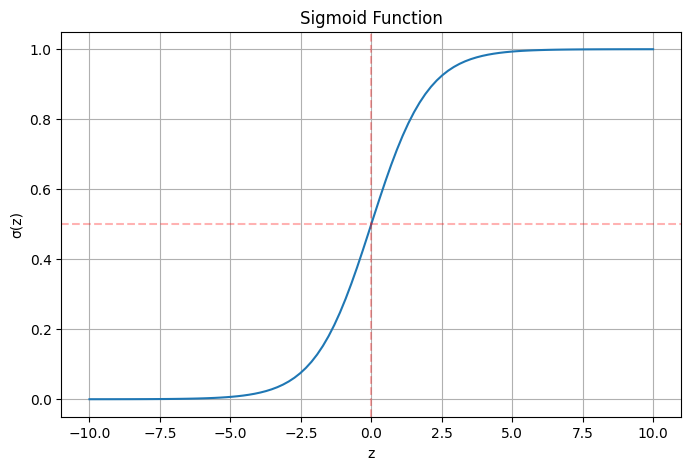

   positive_words  negative_words  contains_no  pronouns_count  \
0               3               2            1               3   
1               1               3            0               2   
2               0               4            1               1   
3               2               1            0               4   
4               5               0            0               3   

   contains_exclamation  log_word_count  sentiment  
0                     0            4.19          1  
1                     1            3.91          0  
2                     0            3.40          0  
3                     1            4.61          1  
4                     1            4.09          1  
Cost after iteration 100: 0.09247573680037333
Cost after iteration 200: 0.08278794644859461
Cost after iteration 300: 0.08119782457531943
Cost after iteration 400: 0.08078011738108931
Cost after iteration 500: 0.08060940989105866
Cost after iteration 600: 0.0805074510838336
Cost after

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Tuple, List, Union, Callable, Literal
import pandas as pd
from numpy.typing import NDArray


def sigmoid(z: Union[float, NDArray]) -> Union[float, NDArray]:
    """
    Implement the sigmoid function: σ(z) = 1/(1 + exp(-z))

    Parameters:
        z: Input value or array

    Returns:
        Sigmoid of the input
    """
    return 1 / (1 + np.exp(-z))


# Visualize the sigmoid function
z: NDArray = np.linspace(-10, 10, 100)
y: NDArray = sigmoid(z)

plt.figure(figsize=(8, 5))
plt.plot(z, y)
plt.title('Sigmoid Function')
plt.ylabel('σ(z)')
plt.xlabel('z')
plt.grid(True)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.show()


class LogisticRegression:
    """Binary logistic regression classifier with gradient descent optimization."""

    def __init__(
        self,
        learning_rate: float = 0.01,
        num_iterations: int = 1000,
        regularization: Optional[Literal['l1', 'l2']] = None,
        lambda_param: float = 0.1
    ) -> None:
        """
        Initialize Logistic Regression with hyperparameters.

        Parameters:
            learning_rate: Learning rate for gradient descent
            num_iterations: Number of iterations for training
            regularization: Type of regularization ('l1', 'l2', or None)
            lambda_param: Regularization strength
        """
        self.learning_rate: float = learning_rate
        self.num_iterations: int = num_iterations
        self.regularization: Optional[Literal['l1', 'l2']] = regularization
        self.lambda_param: float = lambda_param
        self.weights: Optional[NDArray] = None
        self.bias: Optional[float] = None
        self.costs: List[float] = []

    def _initialize_parameters(self, n_features: int) -> None:
        """
        Initialize weights and bias to zeros.

        Parameters:
            n_features: Number of input features
        """
        self.weights = np.zeros(n_features)
        self.bias = 0.0

    def _compute_cost(self, X: NDArray, y: NDArray, y_pred: NDArray) -> float:
        """
        Compute the cost function with optional regularization.

        Parameters:
            X: Input features, shape (m, n_features)
            y: True labels, shape (m,)
            y_pred: Predicted probabilities, shape (m,)

        Returns:
            cost: Cross-entropy loss
        """
        m: int = len(y)

        # Handle numerical stability for log
        epsilon: float = 1e-15
        y_pred_clipped: NDArray = np.clip(y_pred, epsilon, 1 - epsilon)

        # Cross-entropy loss
        cost: float = -1/m * np.sum(y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped))

        # Add regularization if specified
        if self.regularization == 'l2':
            cost += (self.lambda_param / (2 * m)) * np.sum(self.weights ** 2)
        elif self.regularization == 'l1':
            cost += (self.lambda_param / m) * np.sum(np.abs(self.weights))

        return cost

    def _compute_gradients(self, X: NDArray, y: NDArray, y_pred: NDArray) -> Tuple[NDArray, float]:
        """
        Compute gradients for gradient descent.

        Parameters:
            X: Input features, shape (m, n_features)
            y: True labels, shape (m,)
            y_pred: Predicted probabilities, shape (m,)

        Returns:
            dw: Gradient of the loss with respect to weights
            db: Gradient of the loss with respect to bias
        """
        m: int = len(y)
        dw: NDArray = (1/m) * np.dot(X.T, (y_pred - y))
        db: float = (1/m) * np.sum(y_pred - y)

        # Add regularization gradient if specified
        if self.regularization == 'l2':
            dw += (self.lambda_param / m) * self.weights
        elif self.regularization == 'l1':
            dw += (self.lambda_param / m) * np.sign(self.weights)

        return dw, db

    def fit(self, X: NDArray, y: NDArray) -> 'LogisticRegression':
        """
        Train the logistic regression model.

        Parameters:
            X: Input features, shape (m, n_features)
            y: True labels, shape (m,)

        Returns:
            self: Trained model instance
        """
        m, n_features = X.shape
        self._initialize_parameters(n_features)

        for i in range(self.num_iterations):
            # Forward pass
            y_pred: NDArray = self.predict_proba(X)

            # Compute cost
            cost: float = self._compute_cost(X, y, y_pred)
            self.costs.append(cost)

            # Compute gradients
            dw, db = self._compute_gradients(X, y, y_pred)

            # Update parameters
            if self.weights is not None and self.bias is not None:
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            # Print cost every 100 iterations
            if i % 100 == 0 and i > 0:
                print(f"Cost after iteration {i}: {cost}")

        return self

    def predict_proba(self, X: NDArray) -> NDArray:
        """
        Predict class probabilities.

        Parameters:
            X: Input features, shape (m, n_features)

        Returns:
            y_pred: Predicted probabilities, shape (m,)
        """
        if self.weights is None or self.bias is None:
            raise ValueError("Model has not been trained yet. Call fit() first.")

        z: NDArray = np.dot(X, self.weights) + self.bias
        return sigmoid(z)

    def predict(self, X: NDArray, threshold: float = 0.5) -> NDArray:
        """
        Predict binary class labels.

        Parameters:
            X: Input features, shape (m, n_features)
            threshold: Decision boundary

        Returns:
            y_pred: Predicted labels (0 or 1), shape (m,)
        """
        probabilities: NDArray = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

    def evaluate(self, X: NDArray, y: NDArray) -> float:
        """
        Evaluate model accuracy.

        Parameters:
            X: Input features, shape (m, n_features)
            y: True labels, shape (m,)

        Returns:
            accuracy: Proportion of correct predictions
        """
        predictions: NDArray = self.predict(X)
        accuracy: float = np.mean(predictions == y)
        return accuracy


def softmax(z: NDArray) -> NDArray:
    """
    Compute the softmax of matrix z.

    Parameters:
        z: Input array, shape (m, K)

    Returns:
        s: Softmax values, shape (m, K)
    """
    # Shift z for numerical stability (prevents overflow)
    shifted_z: NDArray = z - np.max(z, axis=1, keepdims=True)
    exp_z: NDArray = np.exp(shifted_z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


class MultinomialLogisticRegression:
    """Multinomial logistic regression classifier using softmax activation."""

    def __init__(
        self,
        learning_rate: float = 0.01,
        num_iterations: int = 1000,
        regularization: Optional[Literal['l1', 'l2']] = None,
        lambda_param: float = 0.1
    ) -> None:
        """
        Initialize the multinomial logistic regression model.

        Parameters:
            learning_rate: Learning rate for gradient descent
            num_iterations: Number of iterations for training
            regularization: Type of regularization ('l1', 'l2', or None)
            lambda_param: Regularization strength
        """
        self.learning_rate: float = learning_rate
        self.num_iterations: int = num_iterations
        self.regularization: Optional[Literal['l1', 'l2']] = regularization
        self.lambda_param: float = lambda_param
        self.weights: Optional[NDArray] = None  # Will be of shape (n_features, n_classes)
        self.bias: Optional[NDArray] = None     # Will be of shape (1, n_classes)
        self.costs: List[float] = []
        self.classes: Optional[NDArray] = None

    def _initialize_parameters(self, n_features: int, n_classes: int) -> None:
        """
        Initialize weights and bias to small random values.

        Parameters:
            n_features: Number of input features
            n_classes: Number of output classes
        """
        self.weights = np.random.randn(n_features, n_classes) * 0.01
        self.bias = np.zeros((1, n_classes))

    def _compute_cost(self, X: NDArray, y_one_hot: NDArray, y_pred: NDArray) -> float:
        """
        Compute the cross-entropy cost function with optional regularization.

        Parameters:
            X: Input features, shape (m, n_features)
            y_one_hot: True labels in one-hot encoding, shape (m, n_classes)
            y_pred: Predicted probabilities, shape (m, n_classes)

        Returns:
            cost: Cross-entropy loss
        """
        m: int = X.shape[0]

        # Add epsilon for numerical stability
        epsilon: float = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Cross-entropy loss
        log_probs: NDArray = np.log(y_pred[np.arange(m), np.argmax(y_one_hot, axis=1)])
        cost: float = -np.sum(log_probs) / m

        # Add regularization if specified
        if self.regularization == 'l2' and self.weights is not None:
            cost += (self.lambda_param / (2 * m)) * np.sum(np.square(self.weights))
        elif self.regularization == 'l1' and self.weights is not None:
            cost += (self.lambda_param / m) * np.sum(np.abs(self.weights))

        return cost

    def fit(self, X: NDArray, y: NDArray) -> 'MultinomialLogisticRegression':
        """
        Train the multinomial logistic regression model.

        Parameters:
            X: Input features, shape (m, n_features)
            y: True labels, shape (m,)

        Returns:
            self: Trained model instance
        """
        m, n_features = X.shape
        self.classes = np.unique(y)
        n_classes: int = len(self.classes)

        # Convert y to one-hot encoding
        y_one_hot: NDArray = np.zeros((m, n_classes))
        for i, c in enumerate(self.classes):
            y_one_hot[:, i] = (y == c).astype(int)

        self._initialize_parameters(n_features, n_classes)

        for i in range(self.num_iterations):
            # Forward pass
            if self.weights is None or self.bias is None:
                raise ValueError("Weights and bias not initialized")

            Z: NDArray = np.dot(X, self.weights) + self.bias
            y_pred: NDArray = softmax(Z)

            # Compute cost
            cost: float = self._compute_cost(X, y_one_hot, y_pred)
            self.costs.append(cost)

            # Compute gradients
            dZ: NDArray = y_pred - y_one_hot
            dW: NDArray = (1/m) * np.dot(X.T, dZ)
            db: NDArray = (1/m) * np.sum(dZ, axis=0, keepdims=True)

            # Add regularization gradient if specified
            if self.regularization == 'l2' and self.weights is not None:
                dW += (self.lambda_param / m) * self.weights
            elif self.regularization == 'l1' and self.weights is not None:
                dW += (self.lambda_param / m) * np.sign(self.weights)

            # Update parameters
            if self.weights is not None and self.bias is not None:
                self.weights -= self.learning_rate * dW
                self.bias -= self.learning_rate * db

            # Print cost every 100 iterations
            if i % 100 == 0 and i > 0:
                print(f"Cost after iteration {i}: {cost}")

        return self

    def predict_proba(self, X: NDArray) -> NDArray:
        """
        Predict class probabilities.

        Parameters:
            X: Input features, shape (m, n_features)

        Returns:
            y_pred: Predicted probabilities, shape (m, n_classes)
        """
        if self.weights is None or self.bias is None:
            raise ValueError("Model has not been trained yet. Call fit() first.")

        Z: NDArray = np.dot(X, self.weights) + self.bias
        return softmax(Z)

    def predict(self, X: NDArray) -> NDArray:
        """
        Predict class labels.

        Parameters:
            X: Input features, shape (m, n_features)

        Returns:
            y_pred: Predicted labels, shape (m,)
        """
        if self.classes is None:
            raise ValueError("Model has not been trained yet. Call fit() first.")

        probabilities: NDArray = self.predict_proba(X)
        class_indices: NDArray = np.argmax(probabilities, axis=1)
        return self.classes[class_indices]

    def evaluate(self, X: NDArray, y: NDArray) -> float:
        """
        Evaluate model accuracy.

        Parameters:
            X: Input features, shape (m, n_features)
            y: True labels, shape (m,)

        Returns:
            accuracy: Proportion of correct predictions
        """
        predictions: NDArray = self.predict(X)
        accuracy: float = np.mean(predictions == y)
        return accuracy


def plot_decision_boundary(
    X: NDArray,
    y: NDArray,
    model: Union[LogisticRegression, MultinomialLogisticRegression],
    title: str = "Decision Boundary"
) -> None:
    """
    Plot the decision boundary of a binary classifier on a 2D dataset.

    Parameters:
        X: Input features, shape (m, 2)
        y: True labels, shape (m,)
        model: Trained model with predict method
        title: Title for the plot
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h: float = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z: NDArray = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k', s=40)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


# Example usage:
if __name__ == "__main__":
    # Example data from the textbook, Fig 5.2
    data: dict = {
        'positive_words': [3, 1, 0, 2, 5],
        'negative_words': [2, 3, 4, 1, 0],
        'contains_no': [1, 0, 1, 0, 0],
        'pronouns_count': [3, 2, 1, 4, 3],
        'contains_exclamation': [0, 1, 0, 1, 1],
        'log_word_count': [4.19, 3.91, 3.40, 4.61, 4.09],
        'sentiment': [1, 0, 0, 1, 1]  # 1 for positive, 0 for negative
    }

    df: pd.DataFrame = pd.DataFrame(data)
    print(df.head())

    # Prepare features and target
    X: NDArray = df.drop('sentiment', axis=1).values
    y: NDArray = df['sentiment'].values

    # Train the model
    model: LogisticRegression = LogisticRegression(
        learning_rate=0.1,
        num_iterations=1000,
        regularization='l2',
        lambda_param=0.1
    )
    model.fit(X, y)

    # Print learned weights (corresponding to features)
    feature_names: pd.Index = df.columns[:-1]  # All columns except sentiment
    print("\nLearned Weights:")
    for feature, weight in zip(feature_names, model.weights or []):
        print(f"{feature}: {weight:.4f}")
    print(f"bias: {model.bias:.4f}")

    # Make predictions
    probabilities: NDArray = model.predict_proba(X)
    predictions: NDArray = model.predict(X)

    # Evaluate model
    accuracy: float = model.evaluate(X, y)
    print(f"\nAccuracy on training data: {accuracy:.4f}")

    # Visualize the training process (cost vs iterations)
    plt.figure(figsize=(10, 6))
    plt.plot(model.costs)
    plt.title('Cost Function Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()

    # Create a sample dataset for visualization
    from sklearn.datasets import make_classification

    # Generate a random 2D classification problem
    X_2d, y_2d = make_classification(
        n_samples=200,
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=1,
        n_clusters_per_class=1
    )

    # Train our model
    model_2d: LogisticRegression = LogisticRegression(learning_rate=0.1, num_iterations=2000)
    model_2d.fit(X_2d, y_2d)

    # Plot decision boundary
    plot_decision_boundary(X_2d, y_2d, model_2d, "Logistic Regression Decision Boundary")


Training PyTorch multinomial logistic regression...
Epoch [10/150], Loss: 0.5054, Test Accuracy: 0.9000
Epoch [20/150], Loss: 0.3751, Test Accuracy: 0.9333
Epoch [30/150], Loss: 0.3090, Test Accuracy: 0.9667
Epoch [40/150], Loss: 0.2650, Test Accuracy: 0.9667
Epoch [50/150], Loss: 0.2405, Test Accuracy: 0.9667
Epoch [60/150], Loss: 0.2245, Test Accuracy: 0.9667
Epoch [70/150], Loss: 0.2157, Test Accuracy: 1.0000
Epoch [80/150], Loss: 0.2190, Test Accuracy: 1.0000
Epoch [90/150], Loss: 0.1952, Test Accuracy: 1.0000
Epoch [100/150], Loss: 0.1959, Test Accuracy: 1.0000
Epoch [110/150], Loss: 0.1828, Test Accuracy: 1.0000
Epoch [120/150], Loss: 0.1849, Test Accuracy: 1.0000
Epoch [130/150], Loss: 0.1825, Test Accuracy: 1.0000
Epoch [140/150], Loss: 0.1980, Test Accuracy: 1.0000
Epoch [150/150], Loss: 0.1823, Test Accuracy: 1.0000
Multinomial model final accuracy on test set: 1.0000


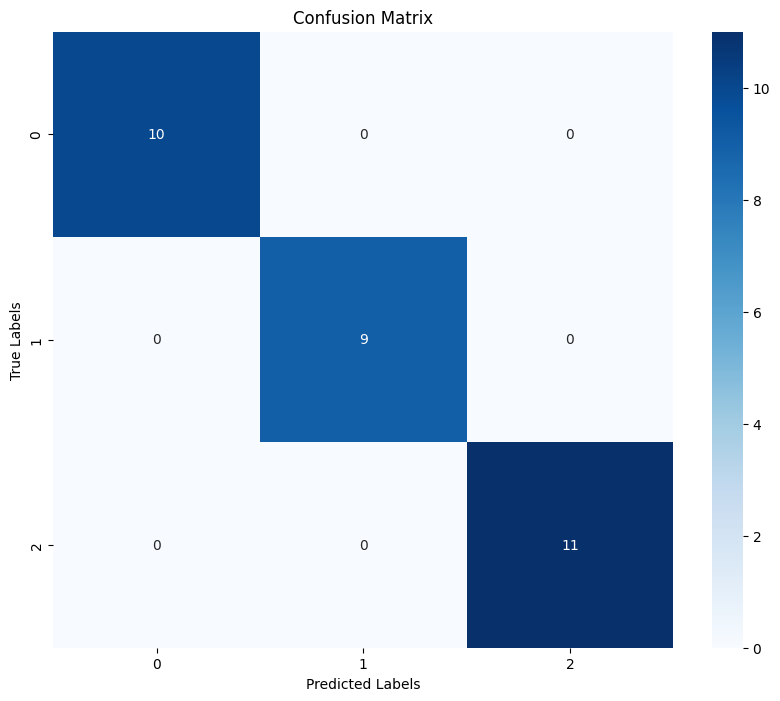

Epoch [10/150], Loss: 0.7173, Test Accuracy: 0.8667
Epoch [20/150], Loss: 0.5770, Test Accuracy: 0.9000
Epoch [30/150], Loss: 0.5385, Test Accuracy: 0.9333
Epoch [40/150], Loss: 0.5120, Test Accuracy: 0.9333
Epoch [50/150], Loss: 0.5033, Test Accuracy: 0.9333
Epoch [60/150], Loss: 0.4633, Test Accuracy: 0.9000
Epoch [70/150], Loss: 0.4647, Test Accuracy: 0.9000
Epoch [80/150], Loss: 0.4648, Test Accuracy: 0.9000
Epoch [90/150], Loss: 0.4574, Test Accuracy: 0.9000
Epoch [100/150], Loss: 0.4558, Test Accuracy: 0.9000
Epoch [110/150], Loss: 0.4516, Test Accuracy: 0.9000
Epoch [120/150], Loss: 0.4472, Test Accuracy: 0.9000
Epoch [130/150], Loss: 0.4659, Test Accuracy: 0.9000
Epoch [140/150], Loss: 0.4645, Test Accuracy: 0.9000
Epoch [150/150], Loss: 0.4667, Test Accuracy: 0.9000


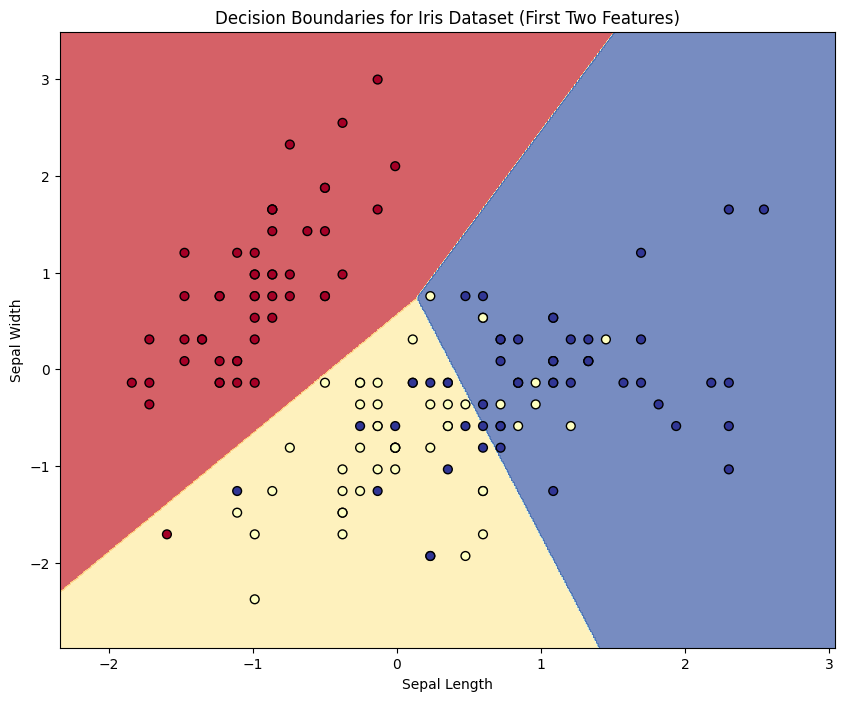

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class MultinomialLogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        """
        PyTorch implementation of Multinomial Logistic Regression

        Parameters:
        input_dim -- dimension of the input features
        num_classes -- number of output classes
        """
        super(MultinomialLogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        """
        Forward pass

        Parameters:
        x -- input features

        Returns:
        output -- logits (before softmax)
        """
        return self.linear(x)

def train_multinomial_model(model, X_train, y_train, X_test, y_test, learning_rate=0.01,
                          num_epochs=100, batch_size=32, weight_decay=0.01):
    """
    Train the PyTorch multinomial logistic regression model

    Parameters:
    model -- PyTorch model
    X_train, y_train -- training data
    X_test, y_test -- test data
    learning_rate -- learning rate for optimizer
    num_epochs -- number of training epochs
    batch_size -- batch size for mini-batch training
    weight_decay -- L2 regularization parameter

    Returns:
    model -- trained model
    train_losses -- list of training losses
    test_accuracies -- list of test accuracies
    """
    # Convert data to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.LongTensor(y_test)

    # Create TensorDataset and DataLoader for batch training
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Combines LogSoftmax and NLLLoss
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Lists to store metrics
    train_losses = []
    test_accuracies = []

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0

        for batch_X, batch_y in train_loader:
            # Forward pass
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        # Calculate average loss for the epoch
        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Evaluate on test set
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            _, predicted = torch.max(test_outputs.data, 1)
            accuracy = (predicted == y_test_tensor).float().mean().item()
            test_accuracies.append(accuracy)

        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}')

    return model, train_losses, test_accuracies

# Load Iris dataset (a classic multiclass problem)
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train multinomial model
print("\nTraining PyTorch multinomial logistic regression...")
input_dim = X_train_scaled.shape[1]
num_classes = len(np.unique(y))
multinomial_model = MultinomialLogisticRegressionModel(input_dim, num_classes)
trained_model, train_losses, test_accuracies = train_multinomial_model(
    multinomial_model,
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test,
    learning_rate=0.01,
    num_epochs=150,
    batch_size=16,
    weight_decay=0.01
)

# Final evaluation
with torch.no_grad():
    X_test_tensor = torch.FloatTensor(X_test_scaled)
    y_test_tensor = torch.LongTensor(y_test)
    test_outputs = trained_model(X_test_tensor)
    _, predicted = torch.max(test_outputs.data, 1)
    final_accuracy = (predicted == y_test_tensor).float().mean().item()
    print(f"Multinomial model final accuracy on test set: {final_accuracy:.4f}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
with torch.no_grad():
    y_pred = multinomial_model(torch.FloatTensor(X_test_scaled))
    _, predicted_classes = torch.max(y_pred, 1)
    predicted_classes = predicted_classes.numpy()

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot decision boundaries for 2D visualization (using first two features)
def plot_decision_boundary_multinomial(X, y, model):
    """
    Plot decision boundaries for multinomial logistic regression using first two features

    Parameters:
    X -- input features
    y -- true labels
    model -- trained PyTorch model
    """
    # Use only the first two features
    X = X[:, :2]

    # Set min and max values with padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01

    # Generate a grid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Get model predictions
    model.eval()
    with torch.no_grad():
        grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
        Z = model(grid)
        _, Z = torch.max(Z, 1)
        Z = Z.numpy().reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', s=40)
    plt.title('Decision Boundaries for Iris Dataset (First Two Features)')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

# Create a new model trained on just the first two features for visualization
X_2d_train = X_train_scaled[:, :2]
X_2d_test = X_test_scaled[:, :2]

model_2d = MultinomialLogisticRegressionModel(2, num_classes)
model_2d, _, _ = train_multinomial_model(
    model_2d,
    X_2d_train,
    y_train,
    X_2d_test,
    y_test,
    learning_rate=0.01,
    num_epochs=150,
    batch_size=16,
    weight_decay=0.01
)

# Plot decision boundaries
plot_decision_boundary_multinomial(np.vstack([X_2d_train, X_2d_test]),
                                 np.hstack([y_train, y_test]),
                                 model_2d)

   positive_words  negative_words  contains_no  pronouns_count  \
0               3               2            1               3   
1               1               3            0               2   
2               0               4            1               1   
3               2               1            0               4   
4               5               0            0               3   

   contains_exclamation  log_word_count  sentiment  
0                     0            4.19          1  
1                     1            3.91          0  
2                     0            3.40          0  
3                     1            4.61          1  
4                     1            4.09          1  
Cost after iteration 100: 0.09247573680037333
Cost after iteration 200: 0.08278794644859461
Cost after iteration 300: 0.08119782457531943
Cost after iteration 400: 0.08078011738108931
Cost after iteration 500: 0.08060940989105866
Cost after iteration 600: 0.0805074510838336
Cost after

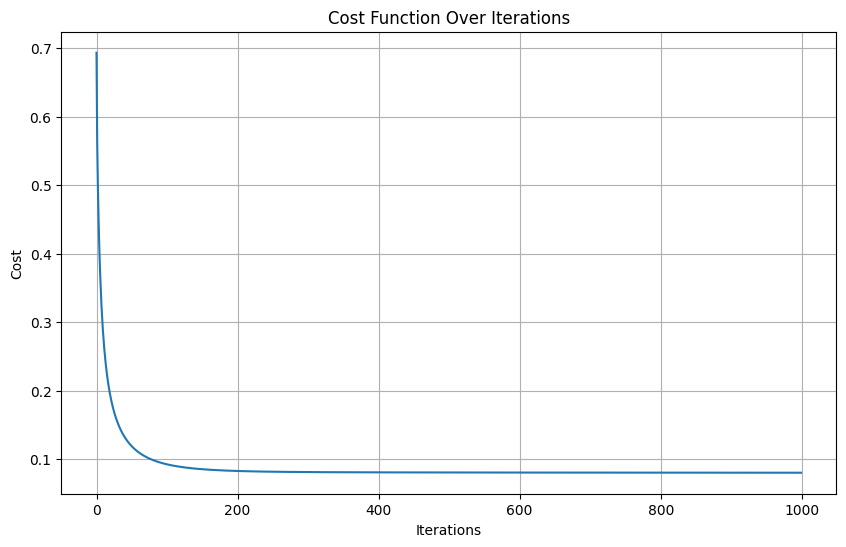

Cost after iteration 100: 0.3329358289245846
Cost after iteration 200: 0.31388362697746547
Cost after iteration 300: 0.3073578558205397
Cost after iteration 400: 0.3042174575882301
Cost after iteration 500: 0.30248717236039574
Cost after iteration 600: 0.30147135139253356
Cost after iteration 700: 0.3008544065751048
Cost after iteration 800: 0.300471939254828
Cost after iteration 900: 0.30023153162268273
Cost after iteration 1000: 0.3000788912180439
Cost after iteration 1100: 0.2999812294381647
Cost after iteration 1200: 0.29991836618050594
Cost after iteration 1300: 0.2998777073371174
Cost after iteration 1400: 0.2998513082486152
Cost after iteration 1500: 0.2998341143373028
Cost after iteration 1600: 0.2998228876071644
Cost after iteration 1700: 0.29981554219140594
Cost after iteration 1800: 0.29981072830506045
Cost after iteration 1900: 0.2998075692607812


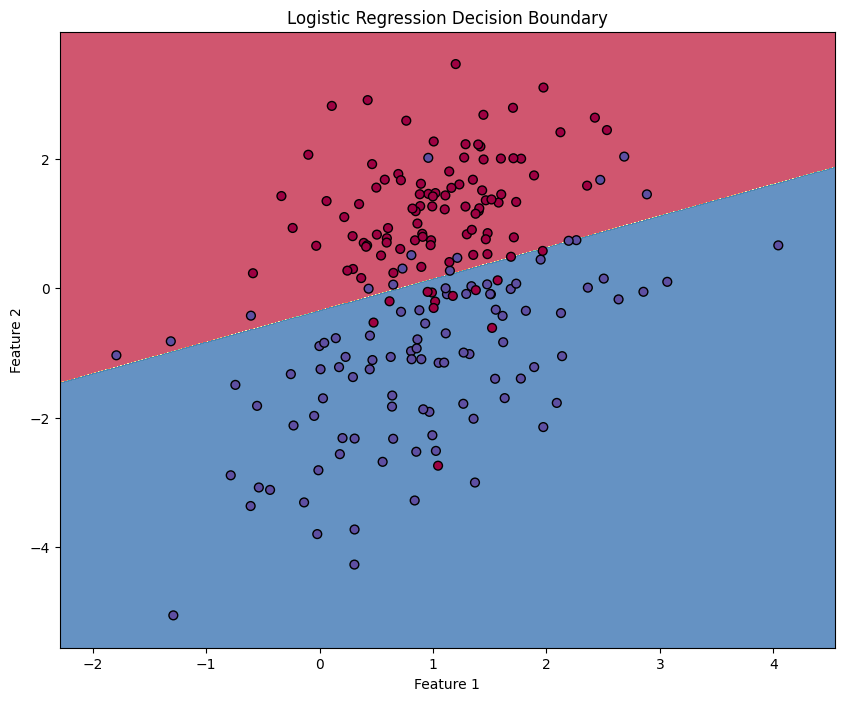

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Tuple, List, Union, Literal, Any, Dict, TypeVar, Generic, Callable, cast
from numpy.typing import NDArray, ArrayLike
import pandas as pd
from pydantic import BaseModel, Field, field_validator, model_validator, TypeAdapter, ConfigDict, computed_field
from pydantic.functional_validators import AfterValidator

# Type variables for generic typing
T = TypeVar('T')
U = TypeVar('U')


# Define Pydantic models for data validation
class FeaturesModel(BaseModel):
    """Validates feature data for logistic regression."""
    model_config = ConfigDict(arbitrary_types_allowed=True)

    data: NDArray = Field(description="Feature matrix, shape (m, n_features)")

    @field_validator('data')
    @classmethod
    def validate_numpy_array(cls, v: Any) -> NDArray:
        """Ensure data is a 2D numpy array."""
        if not isinstance(v, np.ndarray):
            if isinstance(v, (list, tuple)):
                return np.array(v)
            raise ValueError("Data must be a numpy array or convertible to one")

        if v.ndim != 2:
            raise ValueError(f"Feature matrix must be 2D, got shape {v.shape}")

        return v


class LabelsModel(BaseModel):
    """Validates label data for logistic regression."""
    model_config = ConfigDict(arbitrary_types_allowed=True)

    data: NDArray = Field(description="Target labels, shape (m,)")

    @field_validator('data')
    @classmethod
    def validate_numpy_array(cls, v: Any) -> NDArray:
        """Ensure data is a 1D numpy array."""
        if not isinstance(v, np.ndarray):
            if isinstance(v, (list, tuple)):
                return np.array(v)
            raise ValueError("Labels must be a numpy array or convertible to one")

        if v.ndim != 1:
            raise ValueError(f"Labels must be 1D, got shape {v.shape}")

        return v


class HyperparametersModel(BaseModel):
    """Validates hyperparameters for logistic regression."""
    learning_rate: float = Field(
        default=0.01,
        gt=0,
        description="Step size for gradient descent"
    )
    num_iterations: int = Field(
        default=1000,
        gt=0,
        description="Number of iterations for training"
    )
    regularization: Optional[Literal['l1', 'l2']] = Field(
        default=None,
        description="Type of regularization to use (None, 'l1', or 'l2')"
    )
    lambda_param: float = Field(
        default=0.1,
        ge=0,
        description="Regularization strength"
    )


class ModelParametersModel(BaseModel):
    """Validates model parameters (weights and bias)."""
    model_config = ConfigDict(arbitrary_types_allowed=True)

    weights: NDArray = Field(description="Weight vector")
    bias: float = Field(description="Bias term")

    @field_validator('weights')
    @classmethod
    def validate_weights(cls, v: Any) -> NDArray:
        """Ensure weights is a numpy array."""
        if not isinstance(v, np.ndarray):
            if isinstance(v, (list, tuple)):
                return np.array(v)
            raise ValueError("Weights must be a numpy array or convertible to one")

        return v


class PredictionResultModel(BaseModel):
    """Validates prediction results."""
    model_config = ConfigDict(arbitrary_types_allowed=True)

    probabilities: NDArray = Field(description="Predicted probabilities")
    labels: NDArray = Field(description="Predicted class labels")

    @field_validator('probabilities', 'labels')
    @classmethod
    def validate_numpy_array(cls, v: Any) -> NDArray:
        """Ensure prediction results are numpy arrays."""
        if not isinstance(v, np.ndarray):
            if isinstance(v, (list, tuple)):
                return np.array(v)
            raise ValueError("Prediction results must be a numpy array or convertible to one")

        return v


# Define validation functions with validators
def validate_positive(v: float) -> float:
    """Validate that a value is positive."""
    if v <= 0:
        raise ValueError("Value must be positive")
    return v


def validate_probability(v: Union[float, NDArray]) -> Union[float, NDArray]:
    """Validate that values are in the range [0, 1]."""
    if isinstance(v, np.ndarray):
        if not np.all((v >= 0) & (v <= 1)):
            raise ValueError("Probabilities must be in range [0, 1]")
    elif not (0 <= v <= 1):
        raise ValueError("Probability must be in range [0, 1]")
    return v


# Wrap the above validators using Pydantic's validator decorators
PositiveValue = AfterValidator(validate_positive)
ProbabilityValue = AfterValidator(validate_probability)


def sigmoid(z: Union[float, NDArray]) -> Union[float, NDArray]:
    """
    Implement the sigmoid function: σ(z) = 1/(1 + exp(-z))

    Args:
        z: Input value or array

    Returns:
        Sigmoid of the input, with values in the range (0, 1)
    """
    return cast(Union[float, NDArray], 1 / (1 + np.exp(-z)))


def softmax(z: NDArray) -> NDArray:
    """
    Compute the softmax of matrix z.

    Args:
        z: Input array, shape (m, K)

    Returns:
        s: Softmax values, shape (m, K)
    """
    # Shift z for numerical stability (prevents overflow)
    shifted_z: NDArray = z - np.max(z, axis=1, keepdims=True)
    exp_z: NDArray = np.exp(shifted_z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


class LogisticRegression(BaseModel):
    """Binary logistic regression classifier with gradient descent optimization."""
    model_config = ConfigDict(arbitrary_types_allowed=True)

    # Hyperparameters
    hyperparams: HyperparametersModel = Field(default_factory=HyperparametersModel)

    # Model parameters (initialized during fitting)
    weights: Optional[NDArray] = Field(default=None, description="Weight vector")
    bias: Optional[float] = Field(default=None, description="Bias term")

    # Training history
    costs: List[float] = Field(default_factory=list, description="Training cost history")

    @model_validator(mode='after')
    def validate_model_state(self) -> 'LogisticRegression':
        """Validate that weights and bias are either both None or both set."""
        if (self.weights is None) != (self.bias is None):
            raise ValueError("Both weights and bias must be set or both must be None")
        return self

    def is_fitted(self) -> bool:
        """Check if the model has been fitted."""
        return self.weights is not None and self.bias is not None

    def _initialize_parameters(self, n_features: int) -> None:
        """
        Initialize weights and bias to zeros.

        Args:
            n_features: Number of input features
        """
        self.weights = np.zeros(n_features)
        self.bias = 0.0

    def _compute_cost(self, X: NDArray, y: NDArray, y_pred: NDArray) -> float:
        """
        Compute the cost function with optional regularization.

        Args:
            X: Input features, shape (m, n_features)
            y: True labels, shape (m,)
            y_pred: Predicted probabilities, shape (m,)

        Returns:
            cost: Cross-entropy loss
        """
        m: int = len(y)

        # Handle numerical stability for log
        epsilon: float = 1e-15
        y_pred_clipped: NDArray = np.clip(y_pred, epsilon, 1 - epsilon)

        # Cross-entropy loss
        cost: float = -1/m * np.sum(y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped))

        # Add regularization if specified
        if self.hyperparams.regularization == 'l2' and self.weights is not None:
            cost += (self.hyperparams.lambda_param / (2 * m)) * np.sum(self.weights ** 2)
        elif self.hyperparams.regularization == 'l1' and self.weights is not None:
            cost += (self.hyperparams.lambda_param / m) * np.sum(np.abs(self.weights))

        return cost

    def _compute_gradients(self, X: NDArray, y: NDArray, y_pred: NDArray) -> Tuple[NDArray, float]:
        """
        Compute gradients for gradient descent.

        Args:
            X: Input features, shape (m, n_features)
            y: True labels, shape (m,)
            y_pred: Predicted probabilities, shape (m,)

        Returns:
            dw: Gradient of the loss with respect to weights
            db: Gradient of the loss with respect to bias
        """
        m: int = len(y)
        dw: NDArray = (1/m) * np.dot(X.T, (y_pred - y))
        db: float = (1/m) * np.sum(y_pred - y)

        # Add regularization gradient if specified
        if self.hyperparams.regularization == 'l2' and self.weights is not None:
            dw += (self.hyperparams.lambda_param / m) * self.weights
        elif self.hyperparams.regularization == 'l1' and self.weights is not None:
            dw += (self.hyperparams.lambda_param / m) * np.sign(self.weights)

        return dw, db

    def fit(self, X: NDArray, y: NDArray) -> 'LogisticRegression':
        """
        Train the logistic regression model.

        Args:
            X: Input features, shape (m, n_features)
            y: True labels, shape (m,)

        Returns:
            self: Trained model instance
        """
        # Validate input data
        features = FeaturesModel(data=X)
        labels = LabelsModel(data=y)

        X = features.data
        y = labels.data

        m, n_features = X.shape
        self._initialize_parameters(n_features)

        for i in range(self.hyperparams.num_iterations):
            # Forward pass
            y_pred: NDArray = self.predict_proba(X)

            # Compute cost
            cost: float = self._compute_cost(X, y, y_pred)
            self.costs.append(cost)

            # Compute gradients
            dw, db = self._compute_gradients(X, y, y_pred)

            # Update parameters
            if self.weights is not None and self.bias is not None:
                self.weights -= self.hyperparams.learning_rate * dw
                self.bias -= self.hyperparams.learning_rate * db

            # Print cost every 100 iterations
            if i % 100 == 0 and i > 0:
                print(f"Cost after iteration {i}: {cost}")

        return self

    def predict_proba(self, X: NDArray) -> NDArray:
        """
        Predict class probabilities.

        Args:
            X: Input features, shape (m, n_features)

        Returns:
            y_pred: Predicted probabilities, shape (m,)
        """
        if not self.is_fitted():
            raise ValueError("Model has not been trained yet. Call fit() first.")

        # Validate input data
        features = FeaturesModel(data=X)
        X = features.data

        z: NDArray = np.dot(X, cast(NDArray, self.weights)) + cast(float, self.bias)
        return sigmoid(z)

    def predict(self, X: NDArray, threshold: float = 0.5) -> NDArray:
        """
        Predict binary class labels.

        Args:
            X: Input features, shape (m, n_features)
            threshold: Decision boundary

        Returns:
            y_pred: Predicted labels (0 or 1), shape (m,)
        """
        validate_probability(threshold)
        probabilities: NDArray = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

    def evaluate(self, X: NDArray, y: NDArray) -> float:
        """
        Evaluate model accuracy.

        Args:
            X: Input features, shape (m, n_features)
            y: True labels, shape (m,)

        Returns:
            accuracy: Proportion of correct predictions
        """
        # Validate input data
        features = FeaturesModel(data=X)
        labels = LabelsModel(data=y)

        X = features.data
        y = labels.data

        predictions: NDArray = self.predict(X)
        accuracy: float = float(np.mean(predictions == y))
        return accuracy

    def get_model_parameters(self) -> ModelParametersModel:
        """
        Get the model parameters (weights and bias).

        Returns:
            parameters: Model parameters
        """
        if not self.is_fitted():
            raise ValueError("Model has not been trained yet. Call fit() first.")

        return ModelParametersModel(
            weights=cast(NDArray, self.weights),
            bias=cast(float, self.bias)
        )


class MultinomialLogisticRegression(BaseModel):
    """Multinomial logistic regression classifier using softmax activation."""
    model_config = ConfigDict(arbitrary_types_allowed=True)

    # Hyperparameters
    hyperparams: HyperparametersModel = Field(default_factory=HyperparametersModel)

    # Model parameters (initialized during fitting)
    weights: Optional[NDArray] = Field(default=None, description="Weight matrix")
    bias: Optional[NDArray] = Field(default=None, description="Bias vector")
    classes: Optional[NDArray] = Field(default=None, description="Class labels")

    # Training history
    costs: List[float] = Field(default_factory=list, description="Training cost history")

    @model_validator(mode='after')
    def validate_model_state(self) -> 'MultinomialLogisticRegression':
        """Validate that weights, bias, and classes are all set or all None."""
        params = [self.weights, self.bias, self.classes]
        if not all(p is None for p in params) and not all(p is not None for p in params):
            raise ValueError("All of weights, bias, and classes must be set, or all must be None")
        return self

    def is_fitted(self) -> bool:
        """Check if the model has been fitted."""
        return (self.weights is not None and
                self.bias is not None and
                self.classes is not None)

    def _initialize_parameters(self, n_features: int, n_classes: int) -> None:
        """
        Initialize weights and bias to small random values.

        Args:
            n_features: Number of input features
            n_classes: Number of output classes
        """
        self.weights = np.random.randn(n_features, n_classes) * 0.01
        self.bias = np.zeros((1, n_classes))

    def _compute_cost(self, X: NDArray, y_one_hot: NDArray, y_pred: NDArray) -> float:
        """
        Compute the cross-entropy cost function with optional regularization.

        Args:
            X: Input features, shape (m, n_features)
            y_one_hot: True labels in one-hot encoding, shape (m, n_classes)
            y_pred: Predicted probabilities, shape (m, n_classes)

        Returns:
            cost: Cross-entropy loss
        """
        m: int = X.shape[0]

        # Add epsilon for numerical stability
        epsilon: float = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Cross-entropy loss
        log_probs: NDArray = np.log(y_pred[np.arange(m), np.argmax(y_one_hot, axis=1)])
        cost: float = -np.sum(log_probs) / m

        # Add regularization if specified
        if self.hyperparams.regularization == 'l2' and self.weights is not None:
            cost += (self.hyperparams.lambda_param / (2 * m)) * np.sum(np.square(self.weights))
        elif self.hyperparams.regularization == 'l1' and self.weights is not None:
            cost += (self.hyperparams.lambda_param / m) * np.sum(np.abs(self.weights))

        return cost

    def fit(self, X: NDArray, y: NDArray) -> 'MultinomialLogisticRegression':
        """
        Train the multinomial logistic regression model.

        Args:
            X: Input features, shape (m, n_features)
            y: True labels, shape (m,)

        Returns:
            self: Trained model instance
        """
        # Validate input data
        features = FeaturesModel(data=X)
        labels = LabelsModel(data=y)

        X = features.data
        y = labels.data

        m, n_features = X.shape
        self.classes = np.unique(y)
        n_classes: int = len(self.classes)

        # Convert y to one-hot encoding
        y_one_hot: NDArray = np.zeros((m, n_classes))
        for i, c in enumerate(self.classes):
            y_one_hot[:, i] = (y == c).astype(int)

        self._initialize_parameters(n_features, n_classes)

        for i in range(self.hyperparams.num_iterations):
            # Forward pass
            if self.weights is None or self.bias is None:
                raise ValueError("Weights and bias not initialized")

            Z: NDArray = np.dot(X, self.weights) + self.bias
            y_pred: NDArray = softmax(Z)

            # Compute cost
            cost: float = self._compute_cost(X, y_one_hot, y_pred)
            self.costs.append(cost)

            # Compute gradients
            dZ: NDArray = y_pred - y_one_hot
            dW: NDArray = (1/m) * np.dot(X.T, dZ)
            db: NDArray = (1/m) * np.sum(dZ, axis=0, keepdims=True)

            # Add regularization gradient if specified
            if self.hyperparams.regularization == 'l2' and self.weights is not None:
                dW += (self.hyperparams.lambda_param / m) * self.weights
            elif self.hyperparams.regularization == 'l1' and self.weights is not None:
                dW += (self.hyperparams.lambda_param / m) * np.sign(self.weights)

            # Update parameters
            if self.weights is not None and self.bias is not None:
                self.weights -= self.hyperparams.learning_rate * dW
                self.bias -= self.hyperparams.learning_rate * db

            # Print cost every 100 iterations
            if i % 100 == 0 and i > 0:
                print(f"Cost after iteration {i}: {cost}")

        return self

    def predict_proba(self, X: NDArray) -> NDArray:
        """
        Predict class probabilities.

        Args:
            X: Input features, shape (m, n_features)

        Returns:
            y_pred: Predicted probabilities, shape (m, n_classes)
        """
        if not self.is_fitted():
            raise ValueError("Model has not been trained yet. Call fit() first.")

        # Validate input data
        features = FeaturesModel(data=X)
        X = features.data

        Z: NDArray = np.dot(X, cast(NDArray, self.weights)) + cast(NDArray, self.bias)
        return softmax(Z)

    def predict(self, X: NDArray) -> NDArray:
        """
        Predict class labels.

        Args:
            X: Input features, shape (m, n_features)

        Returns:
            y_pred: Predicted labels, shape (m,)
        """
        if not self.is_fitted():
            raise ValueError("Model has not been trained yet. Call fit() first.")

        probabilities: NDArray = self.predict_proba(X)
        class_indices: NDArray = np.argmax(probabilities, axis=1)
        return cast(NDArray, self.classes)[class_indices]

    def evaluate(self, X: NDArray, y: NDArray) -> float:
        """
        Evaluate model accuracy.

        Args:
            X: Input features, shape (m, n_features)
            y: True labels, shape (m,)

        Returns:
            accuracy: Proportion of correct predictions
        """
        # Validate input data
        features = FeaturesModel(data=X)
        labels = LabelsModel(data=y)

        X = features.data
        y = labels.data

        predictions: NDArray = self.predict(X)
        accuracy: float = float(np.mean(predictions == y))
        return accuracy


class DecisionBoundaryPlotter(BaseModel):
    """Utility for plotting decision boundaries of classifiers."""
    model_config = ConfigDict(arbitrary_types_allowed=True)

    @staticmethod
    def plot_decision_boundary(
        X: NDArray,
        y: NDArray,
        model: Union[LogisticRegression, MultinomialLogisticRegression],
        title: str = "Decision Boundary"
    ) -> None:
        """
        Plot the decision boundary of a classifier on a 2D dataset.

        Args:
            X: Input features, shape (m, 2)
            y: True labels, shape (m,)
            model: Trained model with predict method
            title: Title for the plot
        """
        # Validate input data
        features = FeaturesModel(data=X)
        labels = LabelsModel(data=y)

        X = features.data
        y = labels.data

        if X.shape[1] != 2:
            raise ValueError(f"This function only works for 2D feature data, got {X.shape[1]} features")

        # Set min and max values and give it some padding
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        h: float = 0.01

        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Predict the function value for the whole grid
        Z: NDArray = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the contour and training examples
        plt.figure(figsize=(10, 8))
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k', s=40)
        plt.title(title)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.show()


# Example usage code
if __name__ == "__main__":
    # Example data from the textbook, Fig 5.2
    data: Dict[str, List[Union[int, float]]] = {
        'positive_words': [3, 1, 0, 2, 5],
        'negative_words': [2, 3, 4, 1, 0],
        'contains_no': [1, 0, 1, 0, 0],
        'pronouns_count': [3, 2, 1, 4, 3],
        'contains_exclamation': [0, 1, 0, 1, 1],
        'log_word_count': [4.19, 3.91, 3.40, 4.61, 4.09],
        'sentiment': [1, 0, 0, 1, 1]  # 1 for positive, 0 for negative
    }

    df: pd.DataFrame = pd.DataFrame(data)
    print(df.head())

    # Prepare features and target
    X: NDArray = df.drop('sentiment', axis=1).values
    y: NDArray = df['sentiment'].values

    # Create hyperparameters using Pydantic model
    hyperparams = HyperparametersModel(
        learning_rate=0.1,
        num_iterations=1000,
        regularization='l2',
        lambda_param=0.1
    )

    # Create and train the model
    model = LogisticRegression(hyperparams=hyperparams)
    model.fit(X, y)

    # Print learned weights (corresponding to features)
    params = model.get_model_parameters()
    feature_names: List[str] = df.columns[:-1].tolist()

    print("\nLearned Weights:")
    for feature, weight in zip(feature_names, params.weights):
        print(f"{feature}: {weight:.4f}")
    print(f"bias: {params.bias:.4f}")

    # Make predictions
    probabilities: NDArray = model.predict_proba(X)
    predictions: NDArray = model.predict(X)

    # Evaluate model
    accuracy: float = model.evaluate(X, y)
    print(f"\nAccuracy on training data: {accuracy:.4f}")

    # Visualize the training process (cost vs iterations)
    plt.figure(figsize=(10, 6))
    plt.plot(model.costs)
    plt.title('Cost Function Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()

    # Create a sample dataset for visualization
    from sklearn.datasets import make_classification

    # Generate a random 2D classification problem
    X_2d, y_2d = make_classification(
        n_samples=200,
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=1,
        n_clusters_per_class=1
    )

    # Create and train a new model
    model_2d = LogisticRegression(
        hyperparams=HyperparametersModel(
            learning_rate=0.1,
            num_iterations=2000
        )
    )
    model_2d.fit(X_2d, y_2d)

    # Plot decision boundary
    plotter = DecisionBoundaryPlotter()
    plotter.plot_decision_boundary(X_2d, y_2d, model_2d, "Logistic Regression Decision Boundary")